In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Classification : Emission du HC

In [2]:
# Load the data
df3 = pd.read_csv('merged_emission.csv')
df3["type_avion"] = df3['type_avion'].apply(str.upper)

In [3]:
df3['emission_hc'][0]

0.1059116723767896

c:\Users\chell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


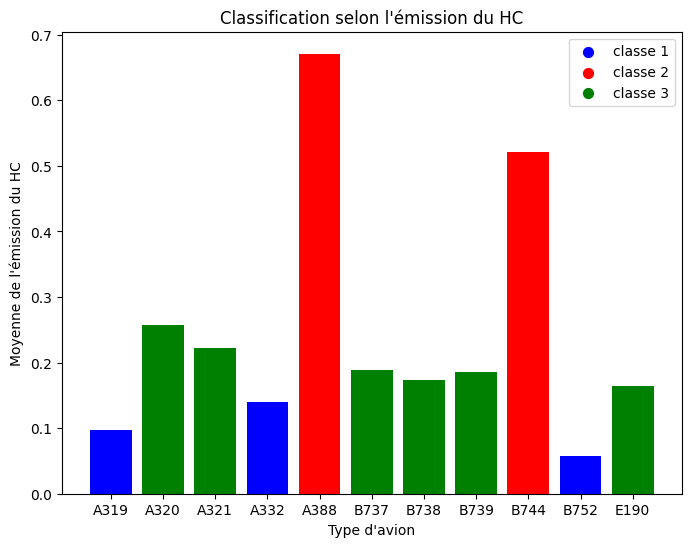

In [4]:
grouped_data = df3.groupby('type_avion')['emission_hc'].mean().reset_index()

# Application de l'algorithme K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(grouped_data[['emission_hc']])
labels = kmeans.labels_

# Définition des couleurs et textes pour chaque label de cluster
colors = {0: ('b', 'classe 1'), 1: ('r', 'classe 2'), 2: ('g', 'classe 3')}

# Plot des résultats avec coloration selon le cluster
plt.figure(figsize=(8, 6))
for i, label in enumerate(labels):
    color, _ = colors[label]
    plt.bar(grouped_data['type_avion'][i], grouped_data['emission_hc'][i], color = color)
    #plt.scatter(grouped_data['type_avion'][i], grouped_data['emission_co2'][i], c=color)

plt.title("Classification selon l'émission du HC")
plt.xlabel('Type d\'avion')
plt.ylabel("Moyenne de l'émission du HC")

# Création de la légende à partir du dictionnaire de couleurs
legend_handles = [plt.scatter([], [], marker='o', s=50, c=color, label=text) for _, (color, text) in colors.items()]
plt.legend(handles=legend_handles)

plt.show()


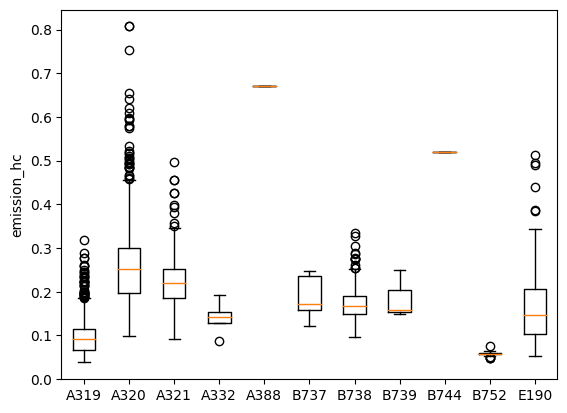

In [5]:
grouped_data = df3.groupby('type_avion')
col = df3.columns[7]
fig, ax = plt.subplots()
ax.boxplot([grouped_data.get_group(name)[col] for name in grouped_data.groups.keys()])
ax.set_xticklabels(grouped_data.groups.keys())
ax.set_ylabel(col)
plt.show()